In [1]:
!pip install qiskit
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':12})
### for Palatino and other serif fonts use:
##rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def X(qc,q,theta):
    """
    exp(-i*theta*X)
    """
    qc.rx(2*theta,q)
    
    
def Y(qc,q,theta):
    """
    exp(-i*theta*Y)
    """
    qc.ry(2*theta,q)
        
    
def Z(qc,q,theta):
    """
    exp(-i*theta*Z)
    """
    qc.rz(2*theta,q)
    
    
def XX(qc,q0,q1,theta):
    """
    exp(-i*theta*X0*X1)
    """
    qc.cx(q0,q1)
    qc.rx(2*theta,q0)
    qc.cx(q0,q1)
    
    
def YY(qc,q0,q1,theta):
    """
    exp(-i*theta*Y0*Y1)
    """
    qc.sdg(q0); qc.sdg(q1)
    qc.cx(q0,q1)
    qc.rx(2*theta,q0)
    qc.cx(q0,q1)
    qc.s(q0); qc.s(q1)
    

def ZZ(qc,q0,q1,theta):
    """
    exp(-i*theta*Z0*Z1)
    """
    qc.cx(q1,q0)
    qc.rz(2*theta,q0)
    qc.cx(q1,q0)

In [3]:
def U_ising(qc,q,h,m,dt):
    """
    exp(-i*dt*H_ising)
    h: coeff of transverse field
    m: coeff of longitudinal field
    """
    N = len(q)
    for i in range(N-1):
        ZZ(qc,q[i],q[i+1],dt)
    for i in range(N):
        Z(qc,q[i],m*dt)
        X(qc,q[i],h*dt)

In [4]:
def basis_rotation(qc,q):
    N = len(q)
    for i in range(N):
        qc.h(q[i])

In [5]:
def digit_sum(n):
    num_str = str(n)
    sum = 0
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
    return sum

## Measure pauli X

In [15]:
N=8
hx=1.05
hz=0.5
T=2
dt=0.05
M=int(T/dt)
times = np.arange(M)

backend = Aer.get_backend("qasm_simulator")
shots = 100 # irrelevant for snapshot

Sx = []
for time in times:

    q = QuantumRegister(N,"q")
    c = ClassicalRegister(N,"c")
    qc = QuantumCircuit(q,c)
    
    for _ in range(time):
       U_ising(qc,q,hx,hz,dt)
    
    basis_rotation(qc,q)
    
    #qc.snapshot("1")
    qc.measure(q,c)
    
    job = execute(qc,backend=backend,shots=shots)
    result = job.result()
    counts = result.get_counts()
    #snapshot = result.data()["snapshots"]["statevector"]["1"][0]

    r1=list(counts.keys())
    r2=list(counts.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(N-2*digit_sum(r1[j]))*r2[j]/shots
    Sx.append(M/N)

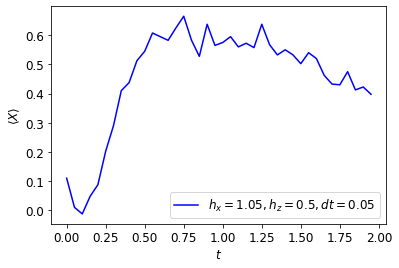

In [19]:
times = np.arange(int(T/0.05))
plt.plot(0.05*times,Sx,'b-',label=r"$h_x=1.05,h_z=0.5, dt=0.05$")
#plt.plot(0.05*times,Sx,'b-')
plt.xlabel("$t$")
plt.ylabel(r"$\langle X\rangle$")
plt.legend()
plt.show()

In [20]:
np.save('hogegoe',np.array(Sx))

In [21]:
Sx

[0.10999999999999999,
 0.01000000000000001,
 -0.012499999999999999,
 0.04750000000000001,
 0.08750000000000001,
 0.20250000000000007,
 0.29000000000000015,
 0.4100000000000001,
 0.43750000000000017,
 0.5125000000000001,
 0.545,
 0.6074999999999998,
 0.595,
 0.5824999999999999,
 0.625,
 0.665,
 0.5824999999999999,
 0.5275000000000001,
 0.6375,
 0.565,
 0.5750000000000001,
 0.595,
 0.5599999999999999,
 0.5725,
 0.5575000000000002,
 0.6375000000000001,
 0.5675000000000001,
 0.5325,
 0.5500000000000002,
 0.5325,
 0.5025000000000001,
 0.5399999999999999,
 0.52,
 0.4625,
 0.4325000000000003,
 0.4300000000000001,
 0.4750000000000001,
 0.4125000000000001,
 0.4225000000000001,
 0.39750000000000013]

In [22]:
Sload=np.load('hogegoe')

FileNotFoundError: ignored

array([ 0.11  ,  0.01  , -0.0125,  0.0475,  0.0875,  0.2025,  0.29  ,
        0.41  ,  0.4375,  0.5125,  0.545 ,  0.6075,  0.595 ,  0.5825,
        0.625 ,  0.665 ,  0.5825,  0.5275,  0.6375,  0.565 ,  0.575 ,
        0.595 ,  0.56  ,  0.5725,  0.5575,  0.6375,  0.5675,  0.5325,
        0.55  ,  0.5325,  0.5025,  0.54  ,  0.52  ,  0.4625,  0.4325,
        0.43  ,  0.475 ,  0.4125,  0.4225,  0.3975])